In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"/electrical_grid.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/electrical_grid.csv'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.stabf.value_counts()

,count
stabf,
unstable,6380
stable,3620


# Dataset Overview

This dataset is related to the **stability of an electrical grid system**. The dataset contains various parameters that describe the behavior of the grid, and a target label indicating whether the grid is in a stable or unstable state.

## Purpose of the Dataset:

The dataset is designed to study and **predict the stability of an electrical grid**. Each row in the dataset corresponds to a set of system parameters, and the target (`stabf`) indicates whether the grid remains stable or becomes unstable given these conditions.

## Columns Description:

1. **tau1, tau2, tau3, tau4**:
   - These columns represent **time constants** of the electrical grid. Time constants describe how quickly the system responds to changes or disturbances.

2. **p1, p2, p3, p4**:
   - These columns represent **power-related parameters** such as active or reactive power measurements. These values likely describe the power flow at various points in the electrical grid.

3. **g1, g2, g3, g4**:
   - These columns represent **grid-related parameters**, potentially gains or other system factors like voltage, current, or frequency at different points in the grid.

4. **stabf**:
   - This column represents the **stability factor** of the grid:
     - `unstable`: Indicates that the grid is unstable.
     - `stable`: Indicates that the grid is stable.

     From the dataset:
     - 6,380 entries are labeled as `unstable`.
     - 3,620 entries are labeled as `stable`.


## Potential Tasks:

- **Exploratory Data Analysis (EDA)**:
  - Investigate the distribution of the parameters (`tau`, `p`, `g`) to understand their ranges and relationships with grid stability.
  - Create visualizations such as histograms, box plots, or scatter plots to gain insights into the data.

- **Classification Task**:
  - Since the `stabf` column represents a binary classification (stable vs. unstable), this dataset can be used for building **classification models**.
  - Potential models include decision trees, KNN, logistic regression, random forests, and support vector machines (SVM) to predict the stability of the grid based on the other features.

- **Correlation and Feature Importance**:
  - Perform correlation analysis to understand the relationships between the parameters.
  - Investigate which parameters (e.g., time constants, power values) are most strongly associated with grid stability using feature importance techniques or correlation matrices.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1015.8+ KB


# Check for missing values

In [ ]:
df.describe()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


In [ ]:
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

NameError: name 'df' is not defined

# Distribution of stability values

In [ ]:
stabf_counts = df['stabf'].value_counts()
print("Distribution of 'stabf' (stability factor):")
print(stabf_counts)

Distribution of 'stabf' (stability factor):
stabf
unstable    6380
stable      3620
Name: count, dtype: int64


# Visualize the distribution of stability values

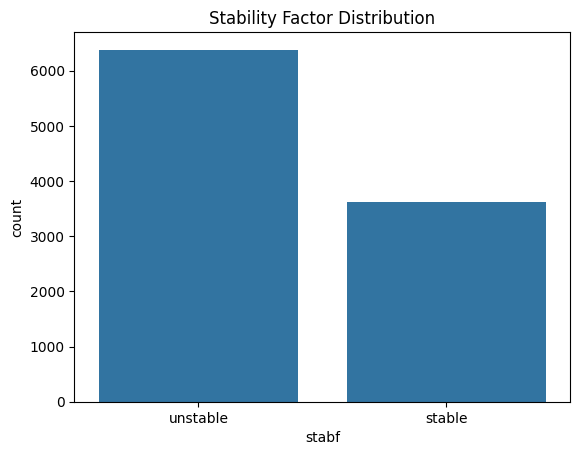

In [ ]:
sns.countplot(data=df, x='stabf')
plt.title('Stability Factor Distribution')
plt.show()

# Visualize the distributions of the numerical features

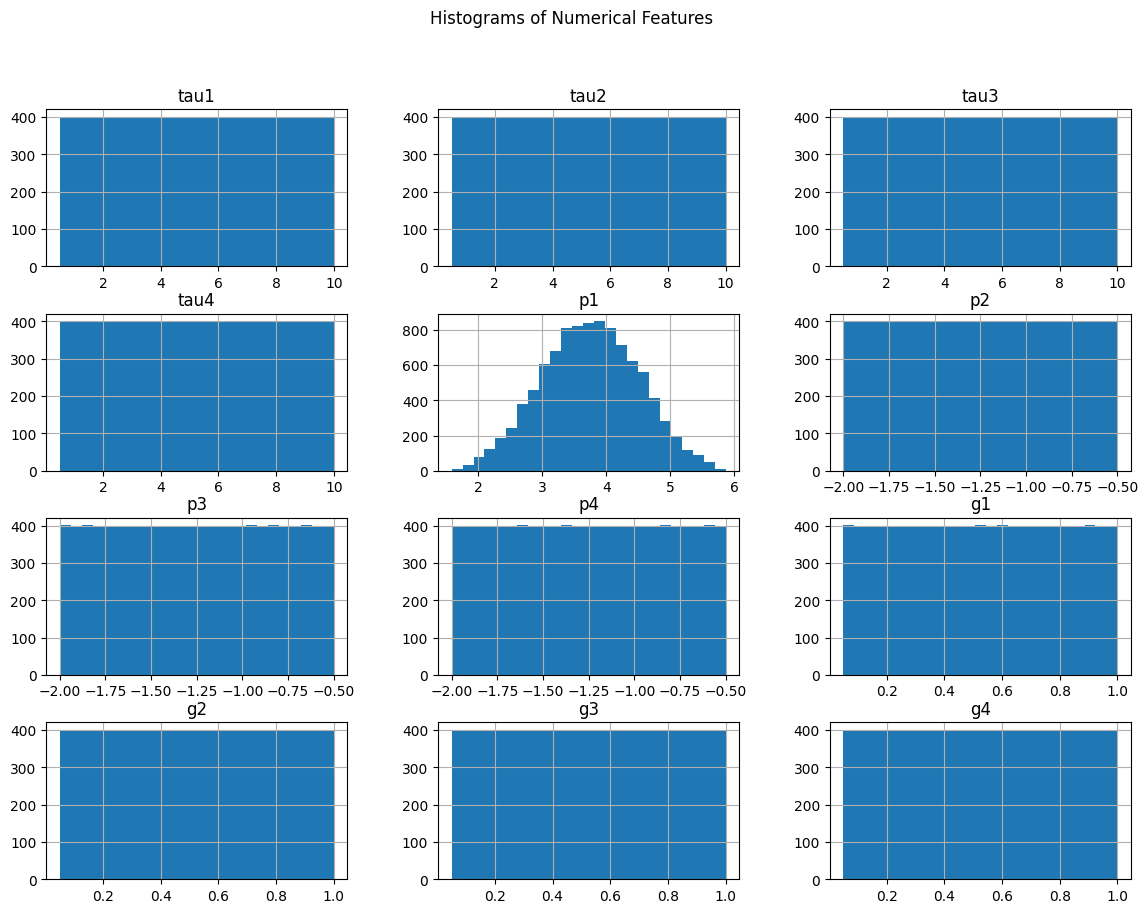

In [ ]:
df.hist(bins=25, figsize=(14, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Convert 'stabf' to a binary variable for correlation analysis (0: stable, 1: unstable)

In [ ]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [ ]:
df['stabf_binary'] = df['stabf'].apply(lambda x: 1 if x == 'unstable' else 0) # encode

In [ ]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf,stabf_binary
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable,1


In [ ]:
df.drop('stabf', axis=1, inplace=True)

In [ ]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf_binary
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


# Calculate the correlation matrix

In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf_binary
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.234898
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.246280
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.237492
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.239375
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.009938
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006173
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.000649
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.022785
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.197664
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.217341


# Display correlation with the stability factor

In [ ]:
stabf_corr = correlation_matrix['stabf_binary'].sort_values(ascending=False)
print("Correlation with stability (stabf_binary):")
print(stabf_corr)

Correlation with stability (stabf_binary):
stabf_binary    1.000000
tau2            0.246280
tau4            0.239375
tau3            0.237492
tau1            0.234898
g3              0.231774
g2              0.217341
g4              0.204931
g1              0.197664
p1              0.009938
p2              0.006173
p3             -0.000649
p4             -0.022785
Name: stabf_binary, dtype: float64


# Visualize the correlation matrix

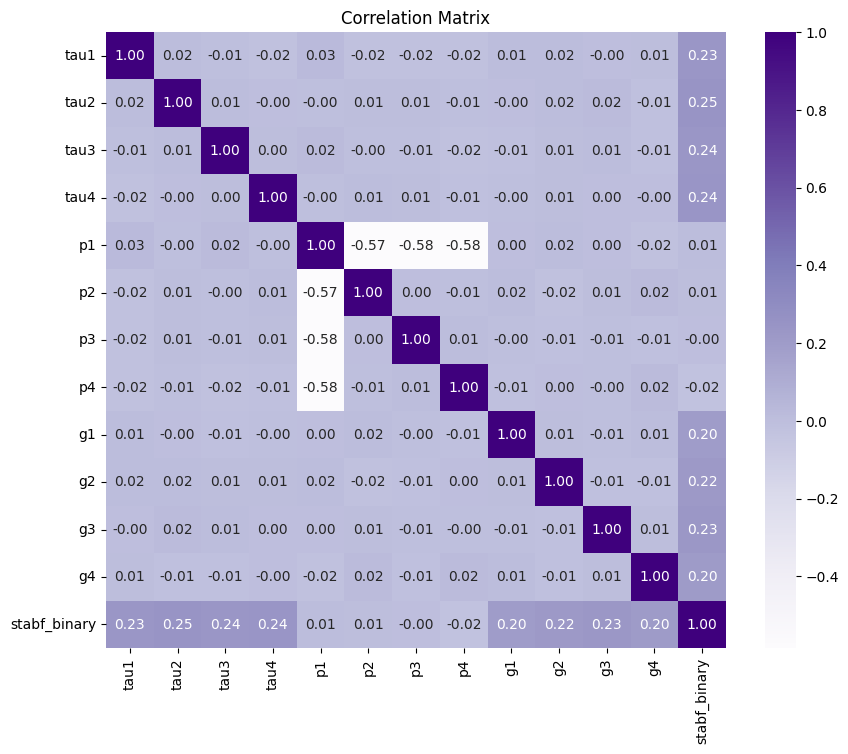

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Visualize the top correlated features with stability

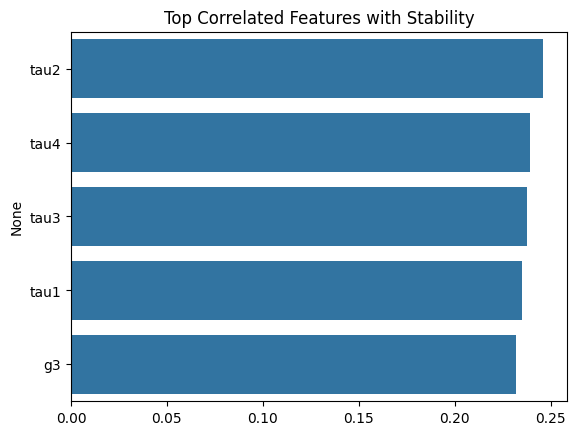

In [ ]:
top_corr = stabf_corr[1:6]  # Top 5 features correlated with stability
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top Correlated Features with Stability')
plt.show()

# Split the data into features (X) and target (y)

In [ ]:
X = df.drop(columns=['stabf_binary'])
y = df['stabf_binary']

# Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9069,7.308766,3.718575,0.890452,9.821006,4.391436,-1.129722,-1.379985,-1.881729,0.198130,0.286181,0.239839,0.255856
2603,1.346364,8.995978,6.588486,3.164015,2.590775,-1.029779,-0.971504,-0.589492,0.141372,0.191807,0.436798,0.563026
7738,6.068477,7.114495,1.643937,3.248104,3.219985,-0.558313,-0.927081,-1.734591,0.470227,0.813813,0.143296,0.449678
1579,6.841556,4.391621,2.974986,9.548470,2.843119,-1.337277,-0.563795,-0.942047,0.493630,0.142099,0.510564,0.965664
5058,2.079181,9.630668,3.308782,3.941799,3.600997,-1.318294,-1.196225,-1.086478,0.654963,0.778023,0.127205,0.393785


In [ ]:
X_train.shape

(7000, 12)

# Standardize the features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

[Watch](https://youtu.be/0T3MpmbAHXg)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification

# K-Neighbors Classifier (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay

In [ ]:
knn = KNeighborsClassifier(n_neighbors=51)
knn

KNeighborsClassifier(n_neighbors=51)

# Train the model

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=51)

# Make predictions

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
knn.score(X_test_scaled, y_test)

0.855

# Evaluate the model

In [ ]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75      1061
           1       0.83      0.98      0.90      1939

    accuracy                           0.85      3000
   macro avg       0.89      0.80      0.82      3000
weighted avg       0.87      0.85      0.85      3000



# Testing Accuracy

In [ ]:
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred_knn))

Testing Accuracy Score: 0.855


# Train Accuracy

In [ ]:
print("Training Accuracy Score:", accuracy_score(y_train, knn.predict(X_train_scaled))) #training accuracy

Training Accuracy Score: 0.8642857142857143


# Confusion matrix for KNN

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn

array([[ 661,  400],
       [  35, 1904]])

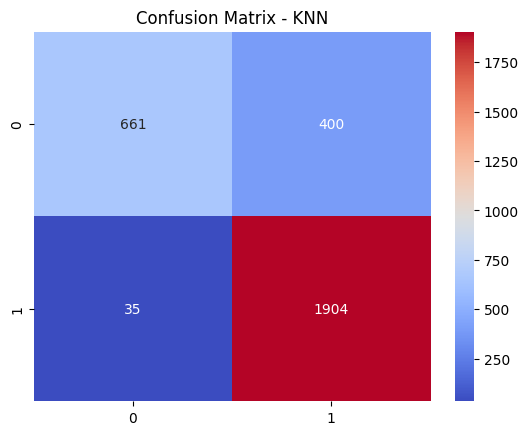

In [ ]:
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm') # cmap='Purples'
plt.title('Confusion Matrix - KNN')
plt.show()

In [ ]:
#(1904+661) / (1904+661+400+35)

# Precision

In [ ]:
precision_score(y_test, y_pred_knn)

0.8263888888888888

# Recall

In [ ]:
recall_score(y_test, y_pred_knn)

0.9819494584837545

# f1_score

In [ ]:
f1_score(y_test, y_pred_knn)

0.8974781993872261

# ROC Curve

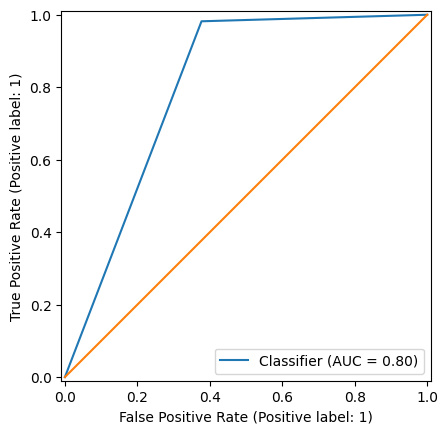

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred_knn)
plt.plot([0,1],[0,1])
plt.show()

# Cross Validation

[Read](https://www.turing.com/kb/different-types-of-cross-validations-in-machine-learning-and-their-explanations)

# 1. K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# Perform K-Fold Cross Validation

In [ ]:
kfold_scores = cross_val_score(knn, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

In [ ]:
kfold_scores

array([0.84142857, 0.86071429, 0.84642857, 0.83285714, 0.84785714])

In [ ]:
kfold_scores.mean()

0.8458571428571429

In [ ]:
print("K-Fold Cross Validation Scores (5 folds):", [f"{score:.2f}" for score in kfold_scores])
print(f"Mean K-Fold Accuracy: {kfold_scores.mean():.2f}")

K-Fold Cross Validation Scores (5 folds): ['0.84', '0.86', '0.85', '0.83', '0.85']
Mean K-Fold Accuracy: 0.85


# StratifiedKFold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
strat_kfold_scores = cross_val_score(knn, X_train_scaled, y_train, cv=strat_kfold, scoring='accuracy')
strat_kfold_scores

array([0.84857143, 0.85142857, 0.84357143, 0.86285714, 0.85785714])

# Round the scores to two decimal places

In [ ]:
strat_kfold_scores_rounded = [round(score, 2) for score in strat_kfold_scores]
strat_kfold_scores_rounded

[0.85, 0.85, 0.84, 0.86, 0.86]

In [ ]:
print("Stratified K-Fold Cross Validation Scores (5 folds):", strat_kfold_scores_rounded)
print(f"Mean Stratified K-Fold Accuracy: {round(strat_kfold_scores.mean(), 2)}")

Stratified K-Fold Cross Validation Scores (5 folds): [0.85, 0.85, 0.84, 0.86, 0.86]
Mean Stratified K-Fold Accuracy: 0.85
